In [1]:
print('通过微调进行迁移学习...。')



通过微调进行迁移学习...。


In [2]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from torchvision import models
from torchvision import transforms as tfs
from torchvision.datasets import ImageFolder


In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline



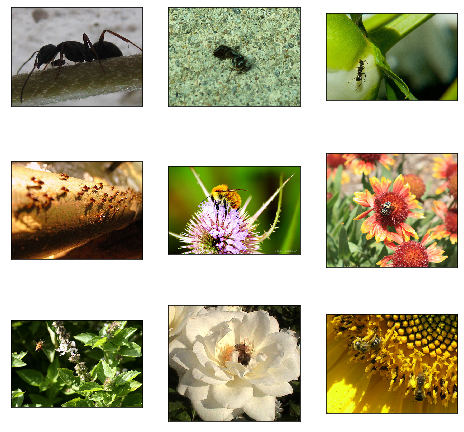

In [4]:
# 读取部分数据
root_path = '../data/hymenoptera_data/train/'
im_list = [os.path.join(root_path, 'ants', i) for i in os.listdir(root_path+'ants')[:4]]
im_list += [os.path.join(root_path, 'bees', i) for i in os.listdir(root_path+'bees')[:5]]

nrows = 3
ncols = 3
figsize = (8,8)

_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(Image.open(im_list[nrows*i+j]))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [5]:
len(im_list)

9

In [6]:
# 定义数据预处理
train_tf = tfs.Compose([
    tfs.RandomResizedCrop(224),
    tfs.RandomHorizontalFlip(),
    tfs.ToTensor(),
    tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_tf = tfs.Compose([
    tfs.Resize(256),
    tfs.CenterCrop(224),
    tfs.ToTensor(),
    tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [7]:
# 使用IamgeFolder 定义数据集
train_set = ImageFolder('../data/hymenoptera_data/train/', train_tf)
valid_set = ImageFolder('../data/hymenoptera_data/val/', valid_tf)
# 使用 DataLoadr 定义迭代器
train_data = DataLoader(train_set, 16, True, num_workers=4)
valid_data = DataLoader(valid_set, 16, False, num_workers=4)

In [8]:
# 使用预训练模型
net = models.resnet50(pretrained=True)
# print(net)

In [9]:
print(net.conv1.weight.shape)


torch.Size([64, 3, 7, 7])


In [10]:
# 将最后的全连接层改成二分类
net.fc = nn.Linear(2048, 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-4)



In [11]:
from C5_CNN.utils import train
train(net, train_data, valid_data, 20, optimizer, criterion)



/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:52: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:53: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 0.562886, Train Acc: 0.707031, Valid Loss: 0.237085, Valid Acc: 0.920139, Time 00:00:05
Epoch 1. Train Loss: 0.211797, Train Acc: 0.921875, Valid Loss: 0.161096, Valid Acc: 0.932639, Time 00:00:05
Epoch 2. Train Loss: 0.182207, Train Acc: 0.937500, Valid Loss: 0.260306, Valid Acc: 0.913889, Time 00:00:05
Epoch 3. Train Loss: 0.165471, Train Acc: 0.933594, Valid Loss: 0.171655, Valid Acc: 0.945139, Time 00:00:05
Epoch 4. Train Loss: 0.131691, Train Acc: 0.949219, Valid Loss: 0.275499, Valid Acc: 0.907639, Time 00:00:05
Epoch 5. Train Loss: 0.082431, Train Acc: 0.976562, Valid Loss: 0.166481, Valid Acc: 0.945139, Time 00:00:05
Epoch 6. Train Loss: 0.124491, Train Acc: 0.949219, Valid Loss: 0.164192, Valid Acc: 0.926389, Time 00:00:05
Epoch 7. Train Loss: 0.082714, Train Acc: 0.984375, Valid Loss: 0.150087, Valid Acc: 0.945139, Time 00:00:05
Epoch 8. Train Loss: 0.109566, Train Acc: 0.960938, Valid Loss: 0.809264, Valid Acc: 0.762500, Time 00:00:05
Epoch 9. Train Loss

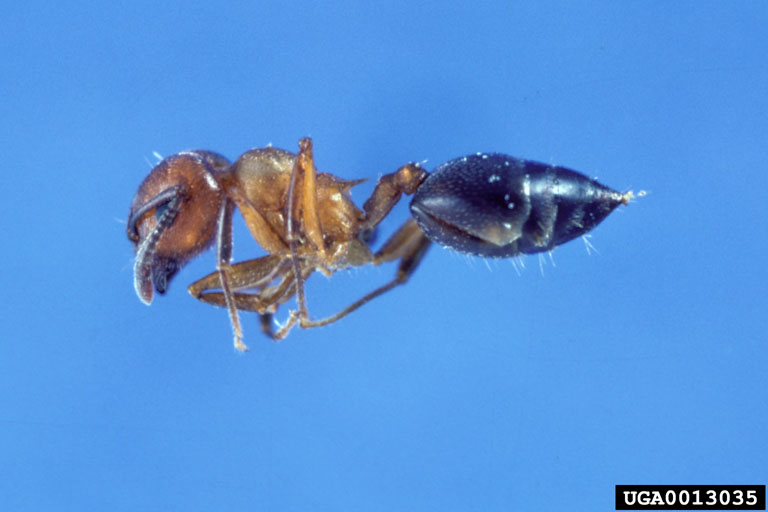

In [12]:
# 可视化预测的结果
net = net.eval()
im1 = Image.open('../data/hymenoptera_data/train/ants/0013035.jpg')
im1


In [13]:
im = valid_tf(im1)
out = net(Variable(im.unsqueeze(0)).cuda())
pred_label = out.max(1)[1].data[0]
print('predict label: {}'.format(train_set.classes[pred_label]))



predict label: ants


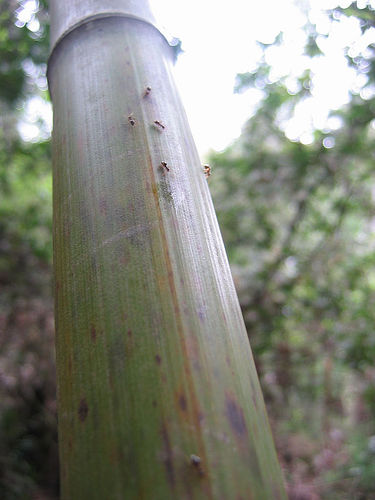

In [14]:
# 可视化预测的结果
im2 = Image.open('../data/hymenoptera_data/val/ants/8124241_36b290d372.jpg')
im2

In [34]:
import time
start = time.time()
im = valid_tf(im2)
out = net(Variable(im.unsqueeze(0)).cuda())
pred_label = out.max(1)[1].data[0]
end = time.time()
usetime = end-start
print('predict label: {}'.format(train_set.classes[pred_label]))
print('use time: {:.6f}'.format(usetime))

predict label: ants
use time: 0.066083


In [24]:
# 保持前面的卷积层的参数不变
net = models.resnet50(pretrained=True)
for param in net.parameters():
    param.requires_grad = False
net.fc = nn.Linear(2048,2)
i = 1
for param in net.parameters():
    print(i)
    print(param.requires_grad)
    i += 1
print(net)

1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False
10
False
11
False
12
False
13
False
14
False
15
False
16
False
17
False
18
False
19
False
20
False
21
False
22
False
23
False
24
False
25
False
26
False
27
False
28
False
29
False
30
False
31
False
32
False
33
False
34
False
35
False
36
False
37
False
38
False
39
False
40
False
41
False
42
False
43
False
44
False
45
False
46
False
47
False
48
False
49
False
50
False
51
False
52
False
53
False
54
False
55
False
56
False
57
False
58
False
59
False
60
False
61
False
62
False
63
False
64
False
65
False
66
False
67
False
68
False
69
False
70
False
71
False
72
False
73
False
74
False
75
False
76
False
77
False
78
False
79
False
80
False
81
False
82
False
83
False
84
False
85
False
86
False
87
False
88
False
89
False
90
False
91
False
92
False
93
False
94
False
95
False
96
False
97
False
98
False
99
False
100
False
101
False
102
False
103
False
104
False
105
False
106
False
107
False
108
False
109
False
110
False
111
Fals

In [25]:
# 注意是net.fc
optimizer = torch.optim.SGD(net.fc.parameters(), lr=1e-2, weight_decay=1e-4)
train(net, train_data, valid_data, 20, optimizer, criterion)



/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:52: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:53: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 0.608545, Train Acc: 0.652344, Valid Loss: 0.345108, Valid Acc: 0.888889, Time 00:00:01
Epoch 1. Train Loss: 0.508816, Train Acc: 0.730469, Valid Loss: 0.319398, Valid Acc: 0.868750, Time 00:00:03
Epoch 2. Train Loss: 0.356920, Train Acc: 0.832031, Valid Loss: 0.312788, Valid Acc: 0.875000, Time 00:00:02
Epoch 3. Train Loss: 0.243359, Train Acc: 0.929688, Valid Loss: 0.305479, Valid Acc: 0.866667, Time 00:00:03
Epoch 4. Train Loss: 0.208187, Train Acc: 0.937500, Valid Loss: 0.191722, Valid Acc: 0.945139, Time 00:00:03
Epoch 5. Train Loss: 0.237584, Train Acc: 0.898438, Valid Loss: 0.156344, Valid Acc: 0.945139, Time 00:00:02
Epoch 6. Train Loss: 0.196771, Train Acc: 0.941406, Valid Loss: 0.158144, Valid Acc: 0.945139, Time 00:00:02
Epoch 7. Train Loss: 0.195853, Train Acc: 0.914062, Valid Loss: 0.184807, Valid Acc: 0.920139, Time 00:00:03
Epoch 8. Train Loss: 0.289087, Train Acc: 0.863281, Valid Loss: 0.362593, Valid Acc: 0.836806, Time 00:00:02
Epoch 9. Train Loss

In [27]:
# 不使用预训练的模型
net = models.resnet50()
net.fc = nn.Linear(2048, 2)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-4)
print(net.conv1.weight.shape)

torch.Size([64, 3, 7, 7])


In [28]:
train(net, train_data, valid_data, 20, optimizer, criterion)

/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:52: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/home/rong/PycharmProjects/PyTorchTutorals/C5_CNN/utils.py:53: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 3.889411, Train Acc: 0.496094, Valid Loss: 8.166098, Valid Acc: 0.562500, Time 00:00:04
Epoch 1. Train Loss: 2.231666, Train Acc: 0.527344, Valid Loss: 13.406894, Valid Acc: 0.437500, Time 00:00:05
Epoch 2. Train Loss: 3.919210, Train Acc: 0.464844, Valid Loss: 6.386042, Valid Acc: 0.562500, Time 00:00:05
Epoch 3. Train Loss: 2.304247, Train Acc: 0.503906, Valid Loss: 4.193074, Valid Acc: 0.562500, Time 00:00:05
Epoch 4. Train Loss: 1.156682, Train Acc: 0.617188, Valid Loss: 0.834835, Valid Acc: 0.562500, Time 00:00:05
Epoch 5. Train Loss: 1.023531, Train Acc: 0.597656, Valid Loss: 2.509344, Valid Acc: 0.562500, Time 00:00:05
Epoch 6. Train Loss: 1.443609, Train Acc: 0.539062, Valid Loss: 1.045788, Valid Acc: 0.562500, Time 00:00:05
Epoch 7. Train Loss: 1.197253, Train Acc: 0.574219, Valid Loss: 13.468278, Valid Acc: 0.437500, Time 00:00:05
Epoch 8. Train Loss: 1.696995, Train Acc: 0.589844, Valid Loss: 0.852043, Valid Acc: 0.631944, Time 00:00:05
Epoch 9. Train Lo